In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import Sequential
import cv2

In [4]:
print(tf.__version__)

2.11.0


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

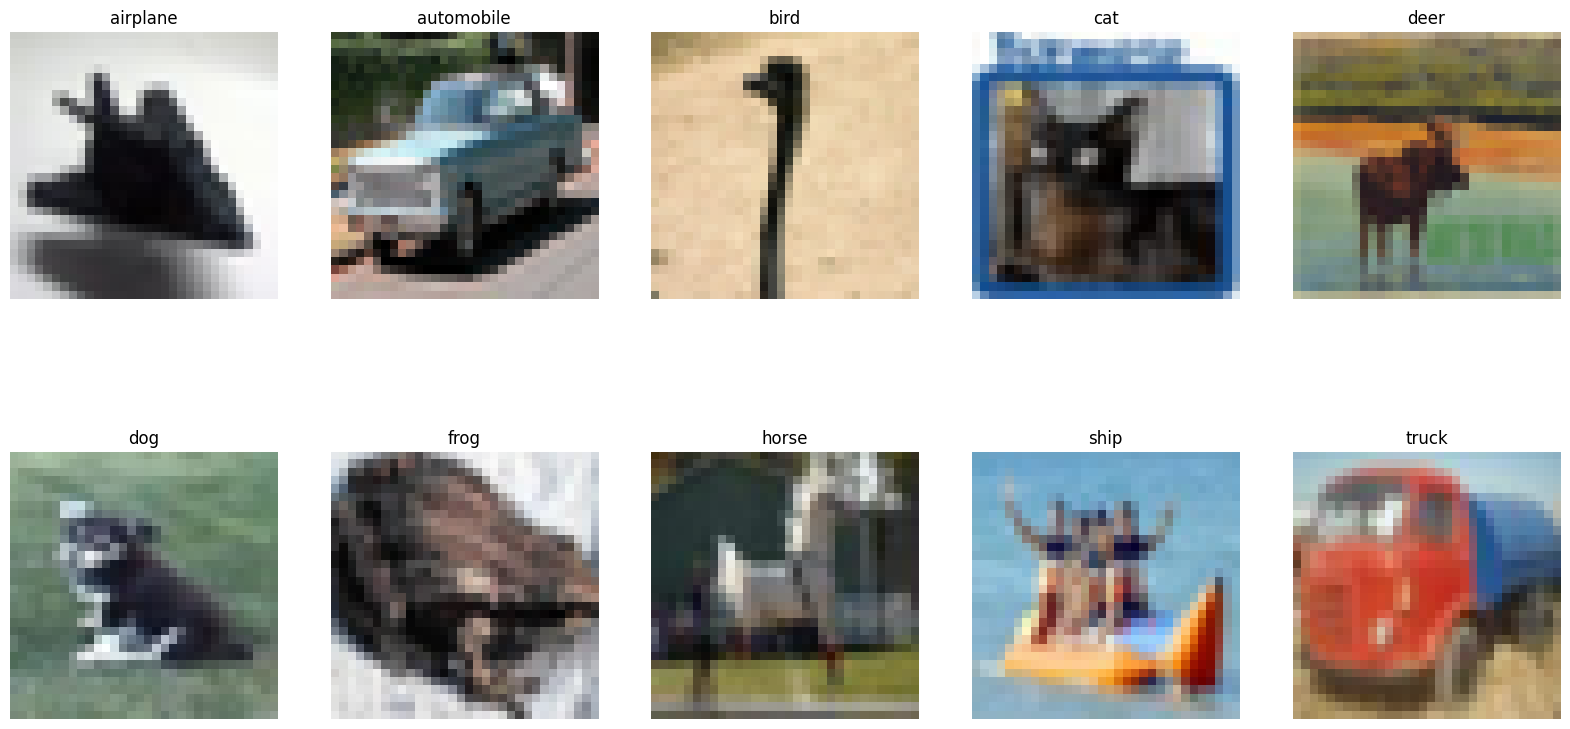

In [21]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(20,10))
j = 0
for i in range(len(x_train)):
    if j == y_train[i]:
        plt.subplot(2,5,j+1)
        plt.axis('off')
        plt.imshow(x_train[i],cmap='gray')
        plt.title(classes[int(y_train[i])])
        # for_save = cv2.cvtColor(x_train[i],cv2.COLOR_BGR2GRAY)
        for_save = cv2.resize(x_train[i],(200,200))
        plt.imsave('class_images/' + f'{classes[int(y_train[i])]}'+ '.png',for_save)
        j += 1

In [16]:
model = Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape = (32,32,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1600,activation='relu'),
    keras.layers.Dense(800,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,
          epochs = 4,
          validation_data = (x_test,y_test),
          batch_size = 32)

Epoch 1/4
391/391 [==============================] - 50s 127ms/step - loss: 1.4717 - accuracy: 0.4592 - val_loss: 1.1082 - val_accuracy: 0.6025
Epoch 2/4
391/391 [==============================] - 50s 127ms/step - loss: 0.9959 - accuracy: 0.6490 - val_loss: 0.9108 - val_accuracy: 0.6829
Epoch 3/4
391/391 [==============================] - 50s 127ms/step - loss: 0.7965 - accuracy: 0.7198 - val_loss: 0.8264 - val_accuracy: 0.7105
Epoch 4/4
391/391 [==============================] - 50s 128ms/step - loss: 0.6530 - accuracy: 0.7723 - val_loss: 0.7827 - val_accuracy: 0.7270


In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.7827 - accuracy: 0.7270


[0.7826951146125793, 0.7269999980926514]

In [ ]:
model.save('model/cifar10.h5')

In [ ]:
!pip freeze > requirements.txt